<a href="https://colab.research.google.com/github/tikendraw/Deeplearning/blob/main/Image_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
ytrain[:11]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0], dtype=uint8)

In [4]:
dir(fashion_mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

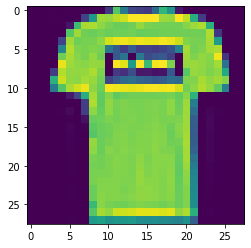

In [5]:
# ploting the image
plt.imshow(xtrain[1])

In [6]:
ytrain[1]

0

In [7]:
labels = {
0 :'T-shirt/top',
1	:'Trouser',
2	:'Pullover',
3	:'Dress',
4	:'Coat',
5	:'Sandal',
6	:'Shirt',
7	:'Sneaker',
8	:'Bag',
9	:'Ankle boot'
}

Text(0.5, 1.0, 'Shirt')

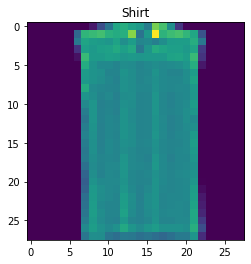

In [8]:
import random
choice = random.randint(0,len(xtrain))
plt.imshow(xtrain[choice])
plt.title(labels[ytrain[choice]])

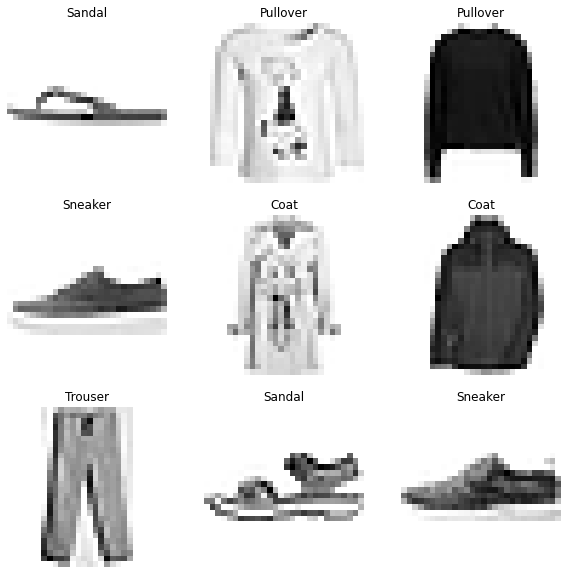

In [9]:
import random

plt.figure(figsize=(10,10))
for i in range(9):
  ax = plt.subplot(3,3,i+1)
  randomn = random.randint(0,len(xtrain))
  plt.imshow(xtrain[randomn],cmap=plt.cm.binary)
  plt.title(labels[ytrain[randomn]])
  plt.axis(False)

# Building the Model for Multiclass classfication

* input shape = 28*28
* output shape = 1 per class(10 in this case)
* loss  =  categorical_Crossentrpy
* output activation = 'Softmax'


In [10]:
xtrain[:3],ytrain[:3]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8),
 array([9, 0, 0], dtype=uint8))

In [18]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28,28)))

# model.add(tf.keras.Input(28,28))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(learning_rate=.0005),metrics = ['accuracy'])


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(xtrain,
                                ytrain,
                                epochs=10,
                                validation_data=(xtest, ytest)) # see how the model performs on the test set during training

In [19]:
history = model.fit(x =xtrain,y = ytrain,epochs=200,validation_split=.1)

Epoch 1/200
1688/1688 [==============================] - 5s 3ms/step - loss: 2.9974 - accuracy: 0.6734 - val_loss: 0.9545 - val_accuracy: 0.7247
Epoch 2/200
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7814 - accuracy: 0.7475 - val_loss: 0.6961 - val_accuracy: 0.7633
Epoch 3/200
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6398 - accuracy: 0.7817 - val_loss: 0.6123 - val_accuracy: 0.7987
Epoch 4/200
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5643 - accuracy: 0.8045 - val_loss: 0.5795 - val_accuracy: 0.8040
Epoch 5/200
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5306 - accuracy: 0.8169 - val_loss: 0.5664 - val_accuracy: 0.8168
Epoch 6/200
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5060 - accuracy: 0.8252 - val_loss: 0.5509 - val_accuracy: 0.8200
Epoch 7/200
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4821 - accuracy: 0.8308 - val_loss: 0.5069 - val_ac

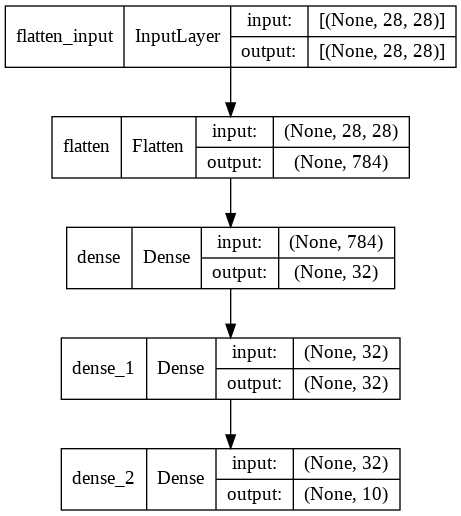

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

# let's normalize the data for better results
 * nueral network tend to prefer normalized data 
 * a normalized data lies between 0 to 1.

In [20]:
xtrain.min(),xtrain.max()

(0, 255)

In [28]:
xtrain_norm = xtrain/xtrain.max()
xtest_norm = xtest/xtest.max()

In [ ]:
xtrain_norm[:1]

In [30]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Flatten(input_shape = (28,28)))

# model.add(tf.keras.Input(28,28))
model2.add(tf.keras.layers.Dense(32,activation='relu'))
model2.add(tf.keras.layers.Dense(32,activation='relu'))
model2.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))

model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate=.005),metrics=['accuracy'])
history2 = model2.fit(xtrain_norm, ytrain, epochs = 200, validation_data=(xtest_norm,ytest))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2431 - accuracy: 0.9103 - val_loss: 0.6520 - val_accuracy: 0.8629
Epoch 199/200
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2360 - accuracy: 0.9115 - val_loss: 0.7139 - val_accuracy: 0.8619
Epoch 200/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2485 - accuracy: 0.9082 - val_loss: 0.7639 - val_accuracy: 0.8599


In [39]:
hi = pd.DataFrame(history.history)
hi.head()

,loss,accuracy,val_loss,val_accuracy
0,2.997428,0.673389,0.954498,0.724667
1,0.781409,0.747463,0.696114,0.763333
2,0.639763,0.781741,0.612291,0.798667
3,0.564328,0.804519,0.579487,0.804000
4,0.530633,0.816870,0.566390,0.816833


In [40]:
hi2 = pd.DataFrame(history2.history)
hi2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.537795,0.805717,0.453990,0.8339
1,0.416306,0.847750,0.444154,0.8455
2,0.393315,0.855600,0.447538,0.8361
3,0.376009,0.863100,0.441844,0.8448
4,0.364936,0.865550,0.431253,0.8467


Text(0.5, 1.0, 'normalized data')

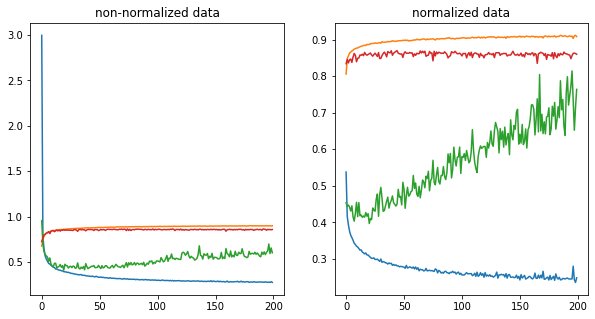

In [46]:
 plt.figure(figsize = (10,5))
 plt.subplot(1,2,1)
 plt.plot(hi)
 plt.title('non-normalized data')
 plt.subplot(1,2,2)
 plt.plot(hi2)
 plt.title('normalized data')

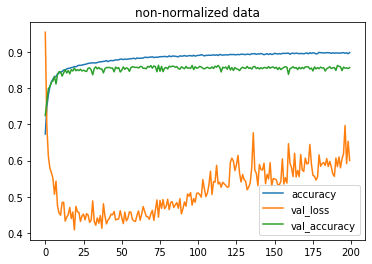

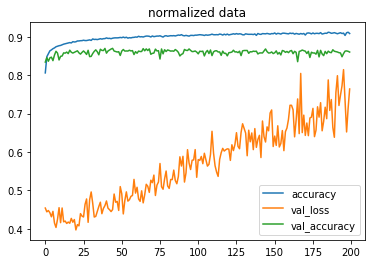

In [48]:
pd.DataFrame(history.history).drop('loss',axis = 1).plot(title = 'non-normalized data')
pd.DataFrame(history2.history).drop('loss',axis = 1).plot(title = 'normalized data')

# Finding the ideal Learning Rate

In [52]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model3.add(tf.keras.layers.Dense(10,activation = 'relu'))
model3.add(tf.keras.layers.Dense(15, activation='relu'))
model3.add(tf.keras.layers.Dense(10,activation='softmax'))

model3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(),metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10 **(epoch/30))

history3 = model3.fit(xtrain_norm,ytrain,epochs=100,validation_data = (xtest_norm,ytest), callbacks = lr_scheduler)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3629 - accuracy: 0.8691 - val_loss: 0.4143 - val_accuracy: 0.8540 - lr: 0.0032
Epoch 47/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3650 - accuracy: 0.8687 - val_loss: 0.4284 - val_accuracy: 0.8474 - lr: 0.0034
Epoch 48/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3630 - accuracy: 0.8683 - val_loss: 0.4175 - val_accuracy: 0.8518 - lr: 0.0037
Epoch 49/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3647 - accuracy: 0.8680 - val_loss: 0.4381 - val_accuracy: 0.8473 - lr: 0.0040
Epoch 50/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3666 - accuracy: 0.8669 - val_loss: 0.4299 - val_accuracy: 0.8489 - lr: 0.0043
Epoch 51/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3677 - accuracy: 0.8653 - val_loss: 0.4634 - val_accuracy: 0.8396 - lr: 0.0046
Epoch 52/100
1875/1875 [==============================] - 4

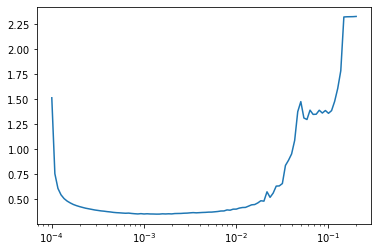

In [53]:
lrs = 1e-4 * 10 **(tf.range(100)/30)
plt.semilogx(lrs,history3.history['loss'])